<a href="https://colab.research.google.com/github/Aryanupadhyay23/XGBoost/blob/main/xgboost_optimizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from time import time

# Generate a large synthetic dataset
X, y = make_classification(n_samples=100000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model using the exact method
exact_model = xgb.XGBClassifier(tree_method='exact', max_depth=6, verbosity=0)

# Define the model using the approx method
approx_model = xgb.XGBClassifier(tree_method='approx', max_depth=6, verbosity=0)

# Train the exact model and measure the time
start_time = time()
exact_model.fit(X_train, y_train)
exact_duration = time() - start_time
exact_predictions = exact_model.predict(X_test)
print(f"Training time for 'exact' method: {exact_duration:.3f} seconds")

# Evaluate the exact model
exact_accuracy = accuracy_score(y_test, exact_predictions)
exact_precision = precision_score(y_test, exact_predictions)
exact_recall = recall_score(y_test, exact_predictions)
exact_f1 = f1_score(y_test, exact_predictions)

print(f"Accuracy (Exact): {exact_accuracy:.3f}")
print(f"Precision (Exact): {exact_precision:.3f}")
print(f"Recall (Exact): {exact_recall:.3f}")
print(f"F1 Score (Exact): {exact_f1:.3f}")

# Train the approx model and measure the time
start_time = time()
approx_model.fit(X_train, y_train)
approx_duration = time() - start_time
approx_predictions = approx_model.predict(X_test)
print(f"\nTraining time for 'approx' method: {approx_duration:.3f} seconds")

# Evaluate the approx model
approx_accuracy = accuracy_score(y_test, approx_predictions)
approx_precision = precision_score(y_test, approx_predictions)
approx_recall = recall_score(y_test, approx_predictions)
approx_f1 = f1_score(y_test, approx_predictions)

print(f"Accuracy (Approx): {approx_accuracy:.3f}")
print(f"Precision (Approx): {approx_precision:.3f}")
print(f"Recall (Approx): {approx_recall:.3f}")
print(f"F1 Score (Approx): {approx_f1:.3f}")


Training time for 'exact' method: 38.746 seconds
Accuracy (Exact): 0.870
Precision (Exact): 0.858
Recall (Exact): 0.888
F1 Score (Exact): 0.873

Training time for 'approx' method: 12.974 seconds
Accuracy (Approx): 0.868
Precision (Approx): 0.857
Recall (Approx): 0.885
F1 Score (Approx): 0.871


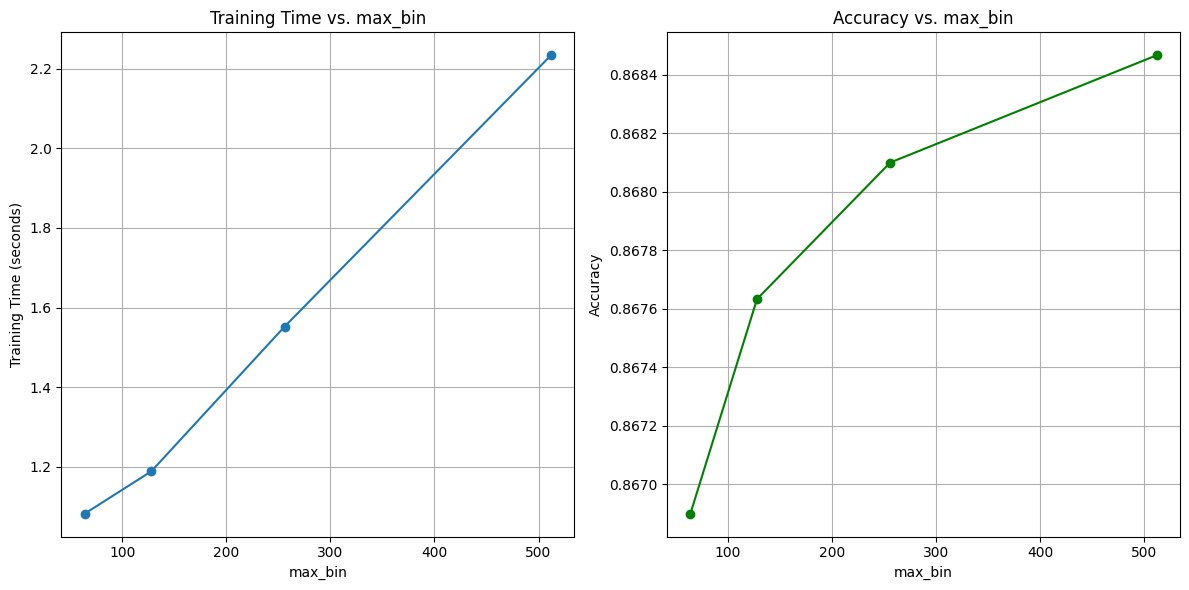

In [2]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time

# Generate a smaller dataset to expedite the demonstration
X, y = make_classification(n_samples=100000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define max_bin values to test
max_bins = [64, 128, 256, 512]

# Initialize lists to store training times and accuracies
training_times = []
accuracies = []

# Loop over max_bin values
for max_bin in max_bins:
    model = xgb.XGBClassifier(tree_method='hist', max_depth=6, max_bin=max_bin, verbosity=0)

    # Measure training time
    start_time = time()
    model.fit(X_train, y_train)
    training_times.append(time() - start_time)

    # Predict and calculate accuracy
    predictions = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Training time plot
ax[0].plot(max_bins, training_times, marker='o')
ax[0].set_title('Training Time vs. max_bin')
ax[0].set_xlabel('max_bin')
ax[0].set_ylabel('Training Time (seconds)')
ax[0].grid(True)

# Accuracy plot
ax[1].plot(max_bins, accuracies, marker='o', color='green')
ax[1].set_title('Accuracy vs. max_bin')
ax[1].set_xlabel('max_bin')
ax[1].set_ylabel('Accuracy')
ax[1].grid(True)

plt.tight_layout()
plt.show()


### Handling Missing Values

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

# Generate a toy regression dataset
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=1)
df = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
df['Target'] = y

# Introduce random missing values (less than 5% in each feature)
for col in df.columns[:-1]:  # Exclude target column
    df.loc[df.sample(frac=0.05, random_state=42).index, col] = np.nan

df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,1.869022,-1.593148,2.301561,-1.106284,0.990264,132.880021
1,-1.043400,1.320418,0.471534,0.956689,0.518969,-13.366442
2,0.194242,-1.061130,-0.366098,0.938927,-1.323831,-8.637123
3,0.463217,0.475341,-0.688159,1.750722,0.565973,108.329759
4,-0.108010,0.567931,-1.146575,0.423871,-0.692175,-18.626612


In [4]:
df.isnull().sum()

,0
Feature_1,50
Feature_2,50
Feature_3,50
Feature_4,50
Feature_5,50
Target,0


In [5]:
# Split the data into training and testing sets
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model without imputation (XGBoost handles missing values)
model_default = XGBRegressor(max_depth=4, n_estimators=10, eta=0.1, objective='reg:squarederror')
model_default.fit(X_train, y_train)
preds_default = model_default.predict(X_test)
mse_default = mean_squared_error(y_test, preds_default)

print(f"MSE for default handling of missing values: {mse_default}")


MSE for default handling of missing values: 8831.930663169682
